# Отчет

Были сгенерированы четыре дискретных распределения с количеством исходов 100, 400, 700, 1000 соответственно. Распределение '100' определено на целочисленных значениях из [0,100) с неубывающей функцией вероятностей. Распределение '400' определено на целочисленных значениях из [0,400) с невозрастающей функцией вероятностей.
Распределение '700' определено на целочисленных значениях из [0,700] с неубывающей функцией вероятностей. Распределение '1000' определено на целочисленных значениях из [0,1000) с невозрастающей функцией вероятностей.
Подробнее о методе генерации распределений смотрите в <b>distr.cpp</b> (функция generate_distribution(..)). 

Для каждого из описанных выше распределений производилась генерация 1000000 случайных значений тремя способами: с использованием префиксных сумм (функция sample_from_distribution(..)), с использованием префиксных сумм и бинарного поиска (функция sample_from_distribution_bin(..)), с использованием 'метода прямоугольников' (функция sample_from_distribution_rect(..)). Ниже представлены соответствующие диаграммы.

Самым быстрым оказался 'метод прямоугольников'(реализация СВ за О(1)), за ним метод с бинарным поиском (реализация СВ за О(log(n))), затем наивный метод с использованием префиксных сумм (реализация СВ за О(n)). Примеры значений времен работы трех методов смотрите в <b>distr.log</b>.

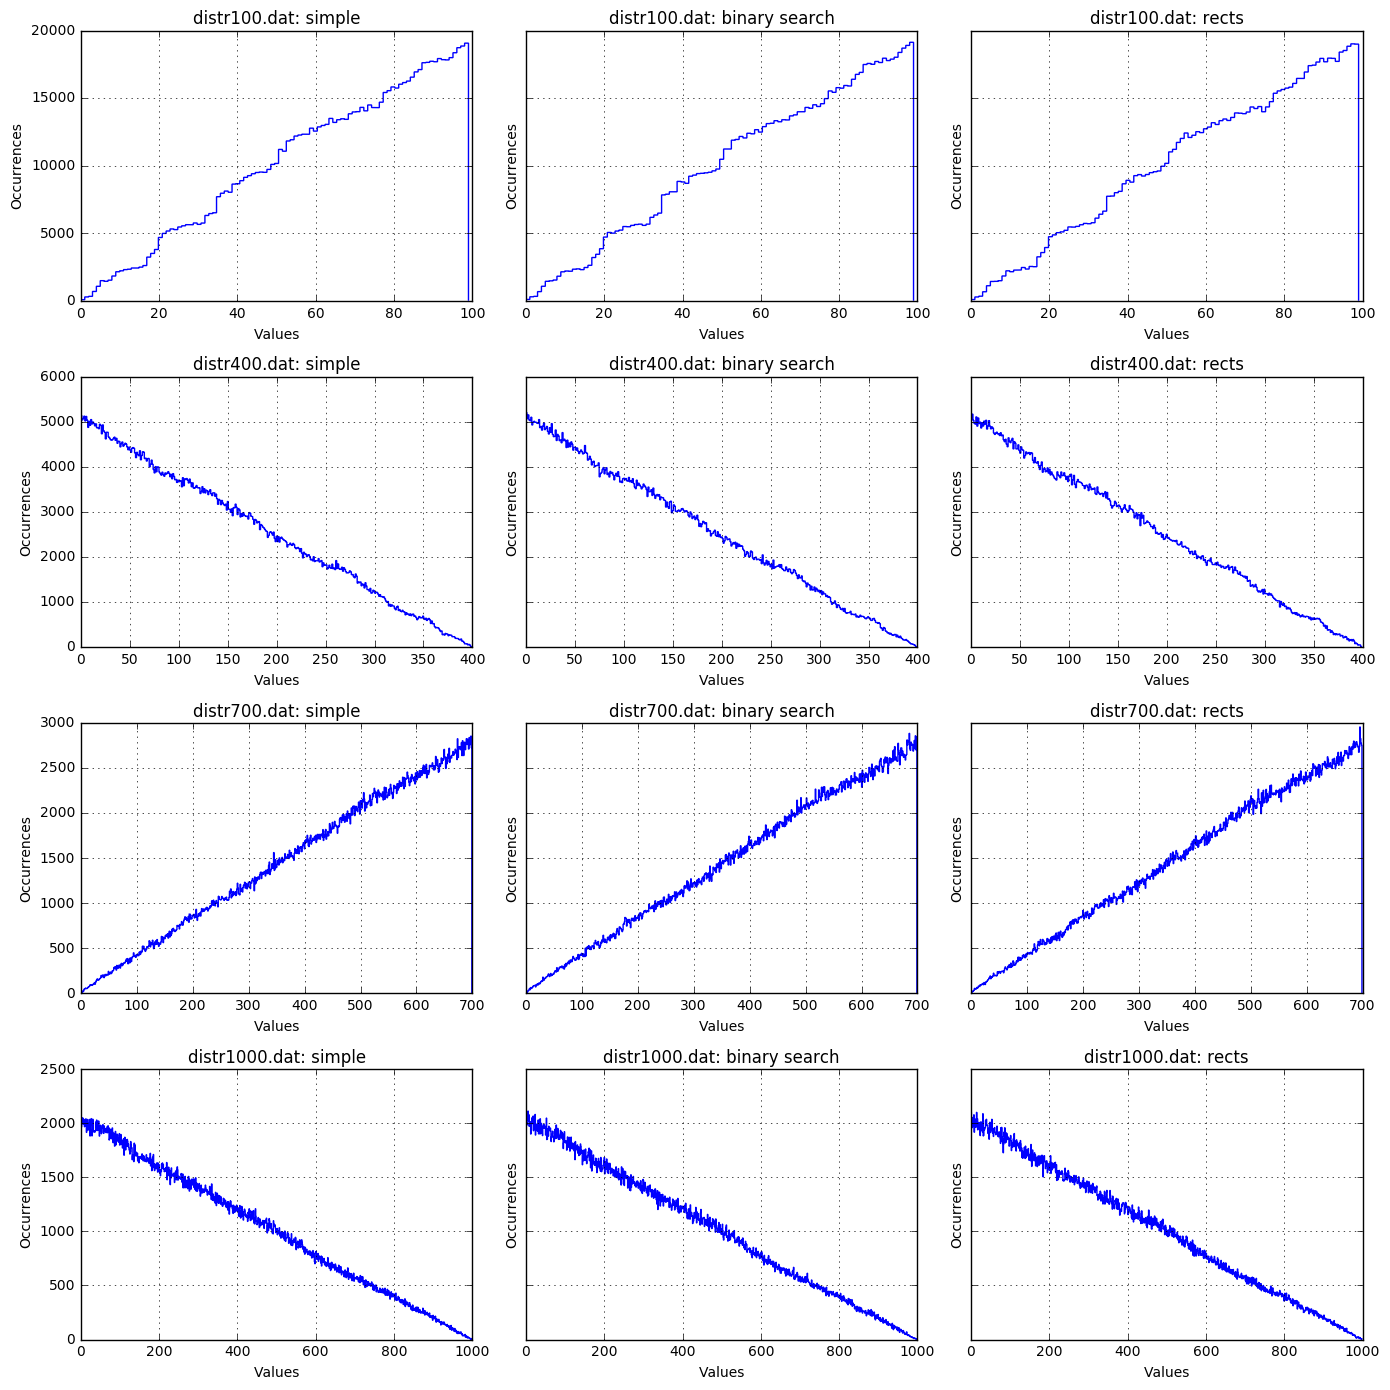

In [14]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


def parse_dat(filename):
    result = []
    with open(filename, "r") as f:
        for i in xrange(3):
            sample_size = int(f.next())
            sample = []
            for j in xrange(sample_size):
                sample.append(int(f.next()))
            result.append(sample)
    return result

def draw(ax, title, data, n):
    ax.set_title(title)
    ax.hist(data, bins=n, histtype='step')
    ax.set_xlabel("Values")
    ax.set_ylabel("Occurrences")
    ax.legend(loc='best', frameon=False)
    ax.grid(True)

fig, axes = plt.subplots(4, 3, sharey="row", figsize=(14,14))
ofs = ["distr100.dat", "distr400.dat", "distr700.dat", "distr1000.dat"]

for i in xrange(4):
    of = ofs[i]
#     n = int(of[5:-4])
    simple, binsearch, rect = parse_dat(of)
    draw(axes[i][0], of + ": simple", simple, len(set(simple)))
    draw(axes[i][1], of + ": binary search", binsearch, len(set(binsearch)))
    draw(axes[i][2], of + ": rects", rect, len(set(rect)))
    
plt.tight_layout()